<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Уменьшение-выборки-(downsampling)" data-toc-modified-id="Уменьшение-выборки-(downsampling)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Уменьшение выборки (downsampling)</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    roc_curve,
    plot_confusion_matrix, 
    f1_score,
    roc_auc_score
    
)
import warnings
warnings.filterwarnings("ignore")

In [2]:
try:
    df = pd.read_csv('/datasets/Churn.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/Churn.csv')


In [3]:
def info(data):
    display(data.head())
    print(data.info())
    print('Количество дубликатов:', data.duplicated().sum())
    print(f''' Количество пропусков:
{data.isna().sum()}''')
    
    display(data.describe())
    print(data.shape)

In [4]:
info(df)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None
Количество дубликатов: 0
 Количество пропусков:
RowNumber            0
CustomerId        

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


(10000, 14)


RowNumber — индекс строки в данных 

CustomerId — уникальный идентификатор клиента

Surname — фамилия

CreditScore — кредитный рейтинг

Geography — страна проживания

Gender — пол

Age — возраст

Tenure — сколько лет человек является клиентом банка

Balance — баланс на счёте

NumOfProducts — количество продуктов банка, используемых 
клиентом

HasCrCard — наличие кредитной карты

IsActiveMember — активность клиента

EstimatedSalary — предполагаемая зарплата

**Exited - это целевой признак**

**Проверим на дубликаты**

In [5]:
f"{df['Tenure'].isna().sum()/df['Tenure'].sum():.2%}"

'2.00%'

In [6]:
df1 = df[df['Tenure'].isna()]

In [7]:
df1

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


In [8]:
df['Tenure'] = df['Tenure']. fillna(df['Tenure'].median())

In [9]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

**Вывод**

RowNumber — столбец дублирует информацию стандартного датафрейма и не несетя ценности для обучения модели. Поэтому столбец можно удалить

CustomerId — является идентификатором пользователя (по данному столбцу значению необходимо проверить наличие дубликатов) и если отсутсвуют — стоблец также можно удалить.

Surname —  не несет ценности для качества будущей модели — столбец можно удалить.

Geography — всего 3 уникальных значения France', 'Spain', 'Germany' — выполнить преобразование OHE / ordinal encoding

Gender — значение преобразовать — OHE / ordinal encoding.

Age — Exited — тип данных верны.


## Исследование задачи

In [11]:
# применяем ohe к 2 признакам
df = pd.get_dummies(df, drop_first=True, columns=['Gender', 'Geography'])

In [12]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,Hill,608,41,1.0,83807.86,1,0,1,112542.58,0,0,0,1
2,3,15619304,Onio,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,Boni,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,Mitchell,850,43,2.0,125510.82,1,1,1,79084.10,0,0,0,1


**Дальше разделим датасет на 3 выборки - обучающую, валидационную и тестовую.
Кроме того, удалим признаки Surmane и CustomerId, так как они никак не влияют на качество обучения **

In [13]:
target = df['Exited']
features = df.drop(['Exited', 'Surname', 'CustomerId', 'RowNumber'], axis=1)

# разделяем на обучающую и тестовую выборки (80/20)
features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target, 
                                                                            test_size=0.2, 
                                                                            random_state=12345)

In [14]:

# разделяем обучающую выборку на обучающую и валидационную (75/25)
features_train, features_valid, target_train, target_valid = train_test_split(features_train, 
                                                                              target_train, 
                                                                              test_size=0.25, 
                                                                              random_state=1235)

**Для масштабирования методом scaler зафиксируем численные признаки**

In [15]:

numeric = ['CreditScore', 'Age',  'Balance','Tenure', 'EstimatedSalary']

In [16]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])

StandardScaler()

In [17]:
#Масштабируем числ признаки обучающей выборки
features_train[numeric] = scaler.transform(features_train[numeric])
features_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain
87,0.809375,-0.842141,1.435890,-1.221559,2,1,0,0.900311,1,0,0
6890,-1.666279,0.016456,-1.447061,-1.221559,3,1,0,1.233643,1,0,0
7951,2.062739,0.111856,-1.807430,-1.221559,2,1,0,-1.718479,0,0,0
1537,1.762346,-1.032940,1.075521,-1.221559,1,1,1,-1.099183,0,0,0
1209,2.062739,-0.651342,0.715152,-1.221559,2,0,0,0.958632,0,0,0


In [18]:
#Масштабируем численные признаки валидационной выборки 
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_valid.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain
1994,0.560774,0.970454,0.715152,-1.221559,1,1,0,-0.636267,0,0,0
4536,-0.091805,1.542852,0.715152,-1.221559,2,1,1,0.025694,0,0,0
2040,-1.075851,-0.078943,-0.005586,1.463024,1,0,1,1.027768,0,0,0
5823,1.037259,1.161253,0.715152,1.151123,1,1,0,0.805509,0,1,0
2715,-0.019296,-0.078943,-1.447061,0.736741,1,0,1,-0.192298,1,0,0


In [19]:

#Масштабируем численные признаки тестовой выборки 
features_test[numeric] = scaler.transform(features_test[numeric])
features_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain
7867,-0.112521,0.684255,-0.726324,-1.221559,1,1,1,0.976576,0,0,1
1402,1.099410,-0.937541,1.075521,0.866412,1,1,0,-0.391979,1,0,0
8606,1.617329,0.302656,-0.005586,-1.221559,2,1,1,-0.436593,1,0,1
8885,0.177513,0.588855,-0.365955,0.420632,2,1,1,1.013385,1,0,1
6494,0.498623,-1.032940,0.715152,-1.221559,2,1,1,-1.343561,1,0,0


**Проверим, разделился ли датасет в назначенных пропорциях**

In [20]:
target_train.shape

(6000,)

In [21]:

round(len(target_train) / len(df), 3)

0.6

In [22]:
target_test.shape

(2000,)

In [23]:
round(len(target_test) / len(df), 3)

0.2

In [24]:
target_valid.shape

(2000,)

In [25]:
round(len(target_valid) / len(df), 3)

0.2

Данные разделены на 3 выборки согласно заданным параметрам.

## Борьба с дисбалансом

In [26]:
target_train.value_counts(normalize = 1)

0    0.7945
1    0.2055
Name: Exited, dtype: float64

Сравним качество предсказаний с константной моделью. За константу примем пример 0, так как это значение встречается почти в 80% случаев

In [27]:
target_pred_constant = pd.Series([0]*len(target_valid))
print(accuracy_score(target_valid, target_pred_constant))

0.8115


Как мы выяснили в нашей выборке отрицательны ответов ≈80% , положитительных ≈ 20%. С уверенностью можем сказать что имеется дисбаланс.

 **Проверка моделей без учета дисбаланса**

**Дерово решений(DecisionTreeClassifier)**

In [28]:

# дерево решений - подберем лучшие гиперпараметры
best_model = None
best_f1 = 0
for depth in range(1, 10):
    model_tree = DecisionTreeClassifier(random_state=12345,
                                        max_depth=depth)
    model_tree.fit(features_train, target_train)
    predictions_valid_tree = model_tree.predict(features_valid)
    f1_tree = f1_score(target_valid, predictions_valid_tree)
    if f1_tree > best_f1:
        best_model = model_tree
        best_depth = depth
        best_f1 = f1_tree
        

print('Оптимальная глубина дерева =', best_depth) 
print('Качество модели - ', f1_tree)

Оптимальная глубина дерева = 7
Качество модели -  0.5501618122977346


In [29]:
# обучаем модель с оптимальными значениями гиперпараметров
model_tree = DecisionTreeClassifier(random_state=12345,
                                    max_depth=7)
model_tree.fit(features_train, target_train)
predictions_valid_tree = model_tree.predict(features_valid)

In [30]:

print("Accuracy_tree:", accuracy_score(target_valid, predictions_valid_tree))
print("Recall_tree:", recall_score(target_valid, predictions_valid_tree))
print("Precision_tree:", precision_score(target_valid, predictions_valid_tree))
print("F1_tree:", f1_score(target_valid, predictions_valid_tree))

Accuracy_tree: 0.865
Recall_tree: 0.4907161803713528
Precision_tree: 0.7034220532319392
F1_tree: 0.578125


**Случайный лес(RandomForestClassifier)**

In [31]:
best_model = None
best_f1 = 0
for depth in range(1,10):
    for est in range(10, 101, 10):
        model = RandomForestClassifier(random_state = 12345,
                                      n_estimators = est,
                                      max_depth = depth)
        model.fit(features_train, target_train)
        predictions_valid_forest = model.predict(features_valid)
        f1_forest = f1_score(target_valid, predictions_valid_forest)
        if f1_forest > best_f1:
            best_model = model
            best_est = est
            best_depth = depth

print('Оптимальное количество оценок =', best_est)
print('Оптимальная глубина дерева =', best_depth)
print('Качество модели - ', f1_forest)

Оптимальное количество оценок = 100
Оптимальная глубина дерева = 9
Качество модели -  0.5559322033898306


In [32]:
# обучаем модель с оптимальными значениями гиперпараметров

model = RandomForestClassifier(random_state=12345, 
                                      n_estimators=100, 
                                      max_depth=9)
model.fit(features_train, target_train)
predictions_valid_forest = model.predict(features_valid)

In [33]:

print("Accuracy_forest:", accuracy_score(target_valid, predictions_valid_forest))
print("Recall_forest:", recall_score(target_valid, predictions_valid_forest))
print("Precision_forest:", precision_score(target_valid, predictions_valid_forest))
print("F1_forest:", f1_score(target_valid, predictions_valid_forest))

Accuracy_forest: 0.869
Recall_forest: 0.4350132625994695
Precision_forest: 0.7699530516431925
F1_forest: 0.5559322033898306


**Логистическая регрессия(LogisticRegression)**

In [34]:

model_log = LogisticRegression(random_state=12345,
                               solver='liblinear')
# обучаем модель на тренировочной выборке
model_log.fit(features_train, target_train)
# получаем предсказания на валидационной выборке
predictions_valid_log = model_log.predict(features_valid)

In [35]:

print("Accuracy_log:", accuracy_score(target_valid, predictions_valid_log))
print("Recall_log:", recall_score(target_valid, predictions_valid_log))
print("Precision_log:", precision_score(target_valid, predictions_valid_log))
print("F1_log:", f1_score(target_valid, predictions_valid_log))

Accuracy_log: 0.8215
Recall_log: 0.246684350132626
Precision_log: 0.5602409638554217
F1_log: 0.34254143646408836


**Вывод**

Без учёта дисбаланса наибольшее значение F1 наблюдается решений и случайный лес - 0.58 и 0.59 соответственно. Проверим эти 2 модели.

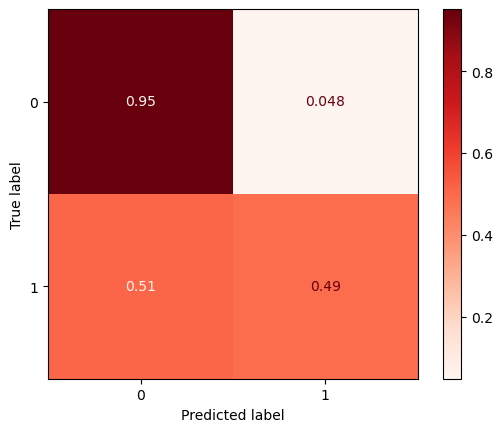

In [36]:
# построим матрицу ошибок, чтобы посмотреть на соотношения TP, TN, FP и FN
plot_confusion_matrix(estimator=model_tree, X=features_valid, y_true=target_valid,
                      normalize='true', cmap='Reds')

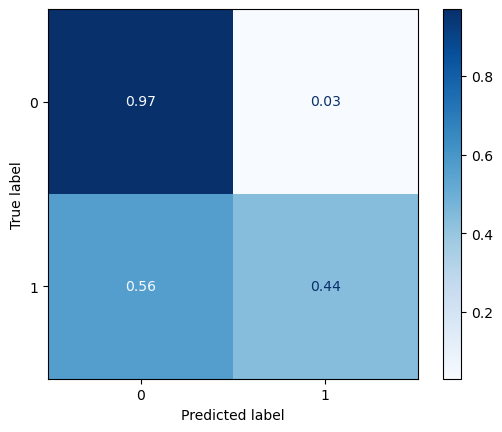

In [37]:
# построим матрицу ошибок, чтобы посмотреть на соотношения TP, TN, FP и FN 
plot_confusion_matrix(estimator=model, X=features_valid, y_true=target_valid,
                      normalize='true', cmap='Blues')

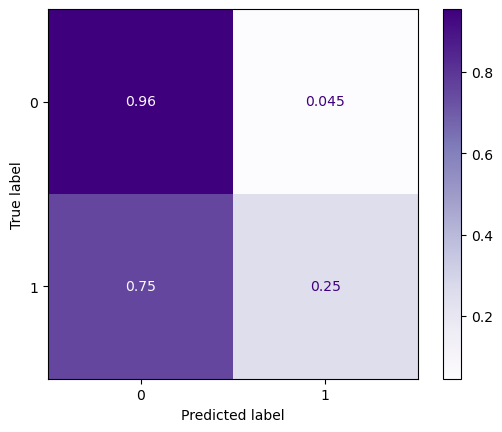

In [38]:
# построим матрицу ошибок, чтобы посмотреть на соотношения TP, TN, FP и FN 
plot_confusion_matrix(estimator=model_log, X=features_valid, y_true=target_valid,
                      normalize='true', cmap='Purples')

Несмотря наа высокие Accuracy,
Матрицы ошибок показалИ сильный дисбаланас классов

**3 метода борьбы с дисбалансом классов:**

* Взвешивание классов
* Увеличение выборки (upsampling)
* Уменьшение выборки (downsampling)

### Взвешивание классов

**Дерево решений**

In [39]:
best_model = None
best_f1 = 0
for depth in range(1, 10):
    model_tree = DecisionTreeClassifier(random_state=12345,
                                        max_depth=depth,
                                        class_weight='balanced')
    model_tree.fit(features_train, target_train)
    predictions_valid_tree = model_tree.predict(features_valid)
    f1_tree = f1_score(target_valid, predictions_valid_tree)
    if f1_tree > best_f1:
        best_model = model_tree
        best_depth = depth
        best_f1 = f1_tree

print('Оптимальная глубина дерева =', best_depth) 
print('Качество модели - ', f1_tree)


Оптимальная глубина дерева = 6
Качество модели -  0.5172074729596854


In [40]:
# обучаем модель с оптимальными значениями гиперпараметров
model_tree = DecisionTreeClassifier(random_state=12345,
                                    max_depth=6,
                                    class_weight='balanced')
model_tree.fit(features_train, target_train)
predictions_valid_tree = model_tree.predict(features_valid)

In [41]:
print("Recall_tree:", recall_score(target_valid, predictions_valid_tree))
print("Precision_tree:", precision_score(target_valid, predictions_valid_tree))
print("F1_tree:", f1_score(target_valid, predictions_valid_tree))

probabilities_valid = model_tree.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("ROC-AUC_tree:", roc_auc_score(target_valid, probabilities_one_valid))

Recall_tree: 0.7320954907161804
Precision_tree: 0.4437299035369775
F1_tree: 0.5525525525525525
ROC-AUC_tree: 0.8385582908815747


**Случайный лес**

In [42]:
# случайный лес - подберем лучшие гиперпараметры
best_model = None
for est in range(10, 101, 10):
    for depth in range(1, 10):
        model = RandomForestClassifier(random_state=12345,
                                              n_estimators=est, 
                                              max_depth=depth,
                                              class_weight='balanced')
        model.fit(features_train, target_train)
        predictions_valid_forest = model.predict(features_valid)
        f1_forest = f1_score(target_valid, predictions_valid_forest)
        if f1_forest > best_f1:
            best_model = model
            best_est = est
            best_depth = depth

print('Оптимальное количество оценок =', best_est)
print('Оптимальная глубина дерева =', best_depth)
print('Качество модели - ', f1_forest)

Оптимальное количество оценок = 100
Оптимальная глубина дерева = 9
Качество модели -  0.5902439024390244


In [43]:
# код ревьюера
f1_forest

0.5902439024390244

In [44]:
# обучаем модель с оптимальными значениями гиперпараметров
model = RandomForestClassifier(random_state=12345, 
                                      n_estimators=100, 
                                      max_depth=9,
                                      class_weight='balanced')
model.fit(features_train, target_train)
predictions_valid_forest = model.predict(features_valid)

In [45]:
print("Recall_forest:", recall_score(target_valid, predictions_valid_forest))
print("Precision_forest:", precision_score(target_valid, predictions_valid_forest))
print("F1_forest:", f1_score(target_valid, predictions_valid_forest))

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("ROC-AUC_forest:", roc_auc_score(target_valid, probabilities_one_valid))

Recall_forest: 0.6419098143236074
Precision_forest: 0.54627539503386
F1_forest: 0.5902439024390244
ROC-AUC_forest: 0.8463989958667758


**Логистическая регрессия**

In [46]:
model_log = LogisticRegression(random_state=12345,
                               solver='liblinear',
                               class_weight='balanced')

model_log.fit(features_train, target_train)
predictions_valid_log = model_log.predict(features_valid)

In [47]:
print("Recall_log:", recall_score(target_valid, predictions_valid_log))
print("Precision_log:", precision_score(target_valid, predictions_valid_log))
print("F1_log:", f1_score(target_valid, predictions_valid_log))

probabilities_valid = model_log.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("ROC-AUC_log:", roc_auc_score(target_valid, probabilities_one_valid))

Recall_log: 0.6710875331564987
Precision_log: 0.3418918918918919
F1_log: 0.45299910474485233
ROC-AUC_log: 0.7596911767349653


### Уменьшение выборки (downsampling)

In [48]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]


    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] +
                                     [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] +
                                   [target_ones])
    
    features_downsampled = shuffle(features_downsampled, random_state=12345)
    target_downsampled = shuffle(target_downsampled, random_state=12345)

    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

print(features_downsampled.shape)
print(target_downsampled.shape)

(2425, 11)
(2425,)


**Дерево решений**

In [49]:
model_tree = DecisionTreeClassifier(random_state=12345,
                                    max_depth=7)
model_tree.fit(features_downsampled, target_downsampled)
predictions_valid_tree = model_tree.predict(features_valid)

print("Recall_tree:", recall_score(target_valid, predictions_valid_tree))
print("Precision_tree:", precision_score(target_valid, predictions_valid_tree))
print("F1_tree:", f1_score(target_valid, predictions_valid_tree))

probabilities_valid = model_tree.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("ROC-AUC_tree:", roc_auc_score(target_valid, probabilities_one_valid))

Recall_tree: 0.6763925729442971
Precision_tree: 0.4242928452579035
F1_tree: 0.5214723926380368
ROC-AUC_tree: 0.7889808472700945


**Случайный лес**

In [50]:
model = RandomForestClassifier(random_state=12345, 
                                      n_estimators=10, 
                                      max_depth=9)
model.fit(features_downsampled, target_downsampled)
predictions_valid_forest = model.predict(features_valid)

print("Recall_forest:", recall_score(target_valid, predictions_valid_forest))
print("Precision_forest:", precision_score(target_valid, predictions_valid_forest))
print("F1_forest:", f1_score(target_valid, predictions_valid_forest))

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("ROC-AUC_forest:", roc_auc_score(target_valid, probabilities_one_valid))

Recall_forest: 0.7427055702917772
Precision_forest: 0.4148148148148148
F1_forest: 0.532319391634981
ROC-AUC_forest: 0.830123506425374


**Логическая регрессия**

In [51]:
model_log = LogisticRegression(random_state=12345,
                               solver='liblinear')

model_log.fit(features_downsampled, target_downsampled)
predictions_valid_log = model_log.predict(features_valid)

print("Recall_log:", recall_score(target_valid, predictions_valid_log))
print("Precision_log:", precision_score(target_valid, predictions_valid_log))
print("F1_log:", f1_score(target_valid, predictions_valid_log))

probabilities_valid = model_log.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("ROC-AUC_log:", roc_auc_score(target_valid, probabilities_one_valid))

Recall_log: 0.6976127320954907
Precision_log: 0.3478835978835979
F1_log: 0.4642541924095323
ROC-AUC_log: 0.7632196982697335


**Вывод**


* Уменьшение и увеличение выборки позволяют достичь примерно одинаковое значение F1-score.

* Наибольшее значение метрики F1-score получено на модели Случайный лес при помощи взвешивания классов. Поэтому для тестирования будем использовать эту модель.

* Значение метрики AUC-ROC всегда стабильно выше F1-score


## Тестирование модели

In [52]:
model_final = RandomForestClassifier(random_state=12345, 
                                      n_estimators=100, 
                                      max_depth=9,
                                      class_weight='balanced')
model_final.fit(features_downsampled, target_downsampled)
predictions_test_forest = model_final.predict(features_test)

print("Recall_forest:", recall_score(target_test, predictions_test_forest))
print("Precision_forest:", precision_score(target_test, predictions_test_forest))
print("F1_forest:", f1_score(target_test, predictions_test_forest))

probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
print("ROC-AUC_forest:", roc_auc_score(target_test, probabilities_one_test))

Recall_forest: 0.7728337236533958
Precision_forest: 0.5271565495207667
F1_forest: 0.6267806267806266
ROC-AUC_forest: 0.8477014788490197


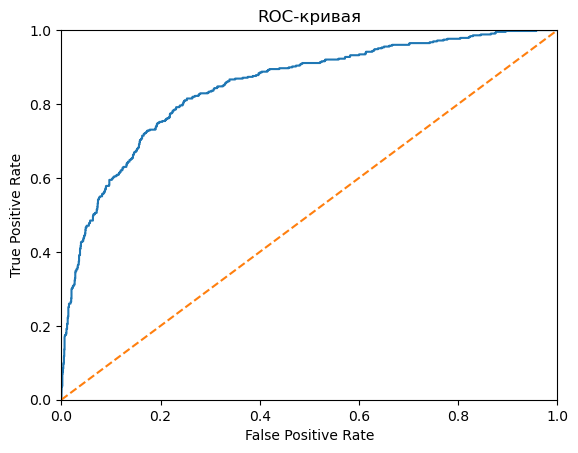

In [53]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test) 

plt.figure()
plt.plot(fpr, tpr, linestyle='solid')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

**Вывод**

* заполнены пропуски в данных
* удалены 2 категориальных столбца CustomerId и Surname + RowNumber, так как они никак не влияют на качество обучения 

* 2 категориальных признака (Gender, Geography) были преобразованы в бинарные при помощи техники One-Hot Ecnoding

* В первоначальные данных наблюдался значительный дисбаланс (80% ответов целевого признака были негативными и только 20% позитивными), из-за чего обученная на этих данных модель не проходила проверку на адекватность.


* устранили дисбаланс классов в обучающей выборки методом upsampling — увеличили количество значений позитивного класса в 4 раза. 


* На новых данных все модели показали результат выше, чем на несбалансированной выборке. Лучшие показатели были у модели случайного леса:

Recall_forest: 0.77

Precision_forest: 0.52

F1_forest: 0.62

ROC-AUC_forest: 0.84

* Далее, наилучшая модель была протестирована на тестовой выборке.
Значения ключевых метрик получились следующие:

F1-score = 0.64 (выше необходимого значения)

AUC-ROC = 0.84 (достаточно близко к единице)

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Увеличение-выборки-(upsampling)" data-toc-modified-id="Увеличение-выборки-(upsampling)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки (upsampling)</a></span></li><li><span><a href="#Уменьшение-выборки-(downsampling)" data-toc-modified-id="Уменьшение-выборки-(downsampling)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Уменьшение выборки (downsampling)</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li></ul></div>